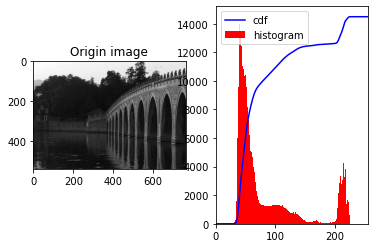

In [3]:
#直方图均衡可以提高图像的对比度
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img20 = cv.imread('../Images/img20.png',0)
hist,bins = np.histogram(img20.flatten(),256,[0,256])
cdf = hist.cumsum()#查看累计直方图
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.subplot(1,2,1),plt.imshow(img20,"gray"),plt.title("Origin image")
plt.subplot(1,2,2),plt.plot(cdf_normalized, color = 'b')
plt.hist(img20.flatten(),256,[0,256], color = 'r'),plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

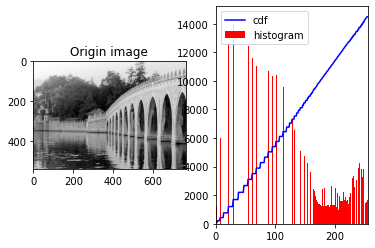

In [4]:
#利用numpy数组进行立方图均衡化
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img20_cdf = cdf[img20]
hist,bins = np.histogram(img20_cdf.flatten(),256,[0,256])
cdf = hist.cumsum()#查看累计直方图
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.subplot(1,2,1),plt.imshow(img20_cdf,"gray"),plt.title("Origin image")
plt.subplot(1,2,2),plt.plot(cdf_normalized, color = 'b')
plt.hist(img20_cdf.flatten(),256,[0,256], color = 'r'),plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

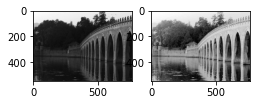

In [8]:
#OpenCV中的直方图均衡
img20 = cv.imread("../Images/img20.png")
img20 = cv.cvtColor(img20, cv.COLOR_BGR2GRAY)
equ = cv.equalizeHist(img20)
plt.subplot(1,3,1),plt.imshow(img20,'gray')
plt.subplot(1,3,2),plt.imshow(equ,'gray')
plt.show()
#当图像的直方图限制在特定区域时，直方图均衡化效果很好。
#在直方图覆盖较大区域（即同时存在亮像素和暗像素）的强度变化较大的地方，效果不好。

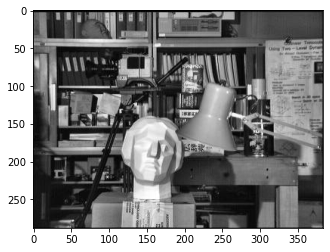

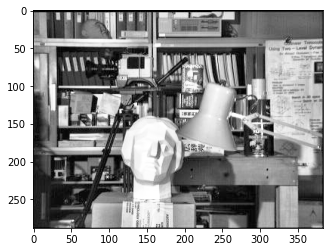

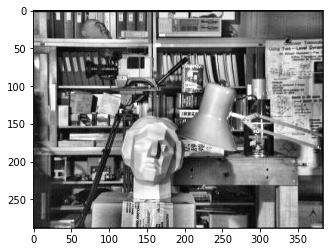

In [16]:
#CLAHE（对比度受限的自适应直方图均衡）
img21 = cv.imread("../Images/img21.png")
img21 = cv.cvtColor(img21, cv.COLOR_BGR2GRAY)
#直接均衡化
equ = cv.equalizeHist(img21)
plt.imshow(img21,'gray')
plt.show()
plt.imshow(equ,'gray')
plt.show()
#自适应直方图均衡
#create a Clahe object (arguments are optional)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img21)
plt.imshow(cl1,'gray')
plt.show()